In [1]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D, BatchNormalization
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import load_img, img_to_array,ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import cv2
from os import listdir
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import random

không ung thư: 1
có ung thư: 0

In [2]:
def create_img_dataset(raw_folder,dataset_name):
    target_size = (224, 224)
    pictures = []
    labels = []
    for folder in listdir(raw_folder):
      print("Folder=",folder)
      for file in listdir(raw_folder + "/" + folder):
        img = cv2.imread((raw_folder + "/" + folder + "/" + file),cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img,dsize = target_size)
        (rows, cols)= img.shape[:2]
        for angle in range(0,360,36):
            M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)    #Rotate 0 degree
            img = cv2.warpAffine(img, M, (224, 224))
            pictures.append(img)
            labels.append(folder)
    pictures = np.array(pictures)
    labels = np.array(labels)
    encoder = LabelBinarizer()
    labels = encoder.fit_transform(labels)
    with open (dataset_name, mode = 'wb') as file:
    # dump information to that file
      pickle.dump((pictures,labels), file)
    file.close()

def load_data(dataset_path):
    file = open(dataset_path, mode = 'rb')
    # dump information to that file
    (pictures, labels) = pickle.load (file)
    file.close()
    return pictures, labels

raw_folder = "/content/drive/MyDrive/imgs_breas_cancer"
create_img_dataset(raw_folder= raw_folder,dataset_name= 'BM.txt')
dataset_path = "BM.txt"
x_data,y_data = load_data(dataset_path= 'BM.txt')
x_train, x_test, y_train, y_test = train_test_split( x_data, y_data, test_size=0.2, random_state=100)


Folder= co
Folder= khong


In [3]:
shapex_train = x_train.shape
shapey_train = y_train.shape
shapex_test = x_test.shape
shapey_test = y_test.shape
print('Kích thước của x_train:', shapex_train)
print('Kích thước của x_test:', shapex_test)

Kích thước của x_train: (1824, 224, 224)
Kích thước của x_test: (456, 224, 224)


In [4]:
y = y_train
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255.0
x_test = x_test/255.0
y_train = np_utils.to_categorical(y_train,2)
y_test = np_utils.to_categorical(y_test,2)

In [5]:
x_label =  ['Cancer','Normal']

In [6]:
def create_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=(224, 224, 1)))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Conv2D(32, kernel_size=(3,3),activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Conv2D(32, kernel_size=(3,3),activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(2, activation='softmax'))
    return model

In [7]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 32)      832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 32)       0

In [8]:
check_point_filepath = './'
model_check_point = ModelCheckpoint(filepath =check_point_filepath, monitor='val_loss', verbose=1, save_best_only=True,
                                    save_weights_only=False, mode='auto', save_freq='epoch')



In [10]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])
hist = model.fit(x_train,
                 y_train,
                 validation_split=0.2,
                 epochs=50,
                 batch_size=64)

Epoch 1/50
23/23 [==============================] - 4s 156ms/step - loss: 0.2501 - accuracy: 0.5182 - val_loss: 0.2485 - val_accuracy: 0.4877
Epoch 2/50
23/23 [==============================] - 2s 95ms/step - loss: 0.2426 - accuracy: 0.5607 - val_loss: 0.2470 - val_accuracy: 0.5014
Epoch 3/50
23/23 [==============================] - 2s 96ms/step - loss: 0.2311 - accuracy: 0.5984 - val_loss: 0.2520 - val_accuracy: 0.5288
Epoch 4/50
23/23 [==============================] - 2s 96ms/step - loss: 0.2176 - accuracy: 0.6395 - val_loss: 0.2395 - val_accuracy: 0.6055
Epoch 5/50
23/23 [==============================] - 2s 97ms/step - loss: 0.2055 - accuracy: 0.6765 - val_loss: 0.2407 - val_accuracy: 0.5753
Epoch 6/50
23/23 [==============================] - 2s 97ms/step - loss: 0.1922 - accuracy: 0.6806 - val_loss: 0.2245 - val_accuracy: 0.6575
Epoch 7/50
23/23 [==============================] - 2s 97ms/step - loss: 0.1740 - accuracy: 0.7389 - val_loss: 0.2138 - val_accuracy: 0.6521
Epoch 8/50
2

Best Validation Loss: 0.1763
Best Validation Accuracy: 0.8027


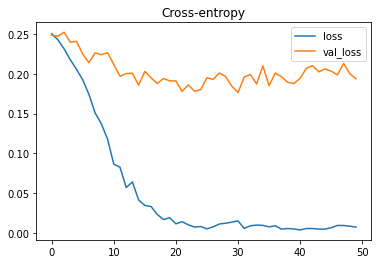

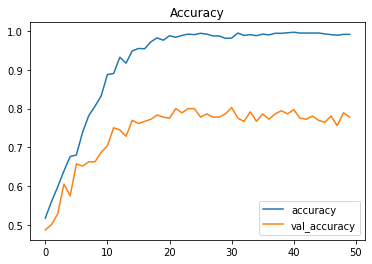

In [11]:
history_df = pd.DataFrame(hist.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")
print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_accuracy'].max()))

In [12]:
# serialize model to JSON
model_json = model.to_json()
with open("breast_N_C.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("breast_N_C.h5")
print("Saved model to disk")

Saved model to disk


In [13]:
p=0
n = 0
num_img = shapex_test[0]
for i in range(1,num_img):
  sample = np.array([x_test[i]])
  predictions = np.argmax(model.predict(sample), axis=-1)
  if y_test[i][1] == predictions[0]:
    n = n+1
  else:
    n=n
p = (n/num_img)*100
print('Tỷ lệ nhận dạng chính xác là: %d phần trăm'%(p))

Tỷ lệ nhận dạng chính xác là: 79 phần trăm


Nhận diện bằng bộ hình test không được sử dụng để training

In [16]:
n = 0
labelcsv = 'label_demo.csv'
label = np. loadtxt(labelcsv, delimiter=",")
def prepare(filepath):
    IMG_SIZE = 224
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
for i in range(1,100):
  imgepath = '/content/drive/MyDrive/_test_demo/_%03d.jpg'%(i)
  prediction = model.predict([prepare(imgepath)])
  if label[i] == predictions[0]:
    n = n+1
  else:
    n=n
p = (n/100)*100
print('Tỷ lệ nhận dạng chính xác là: %d phần trăm'%(p))

Tỷ lệ nhận dạng chính xác là: 69 phần trăm


Nhận diện hình bất kỳ trên internet

Kết quả là: Normal


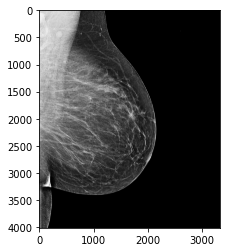

In [17]:
def prepare(filepath):
    IMG_SIZE = 224
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
imgepath = 'Normal.jpg'
plt.imshow(cv2.imread(imgepath))
prediction = np.argmax(model.predict([prepare(imgepath)]),axis=-1)
result = x_label[prediction[0]]
print('Kết quả là:',result)
#prediction[0]

Kết quả là: Cancer


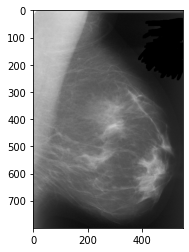

In [18]:
def prepare(filepath):
    IMG_SIZE = 224
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
imgepath = 'cancer.png'
plt.imshow(cv2.imread(imgepath))
prediction = np.argmax(model.predict([prepare(imgepath)]),axis=-1)
result = x_label[prediction[0]]
print('Kết quả là:',result)
#prediction[0]